# 1-9 Potenserekker

### Task 1
> **Find** the angle without using arctan for a triangale with sides 15 and 19      

In [2]:
# Define x
x = 15/19

# Calcualte arctan using taylor series
arctan = 0

for n in range(0, 100):
    arctan += ((-1)**n)*(x**(2*n+1))/(2*n+1)

# Print result
print("arctan(15/19) = ", arctan, "rad, and ", arctan*180/3.1415, "degrees")


arctan(15/19) =  0.6682894188305845 rad, and  38.291292500240395 degrees


### Task 5
> **Plot** the exponential function and a couple of the taylor polynoms in the same figure

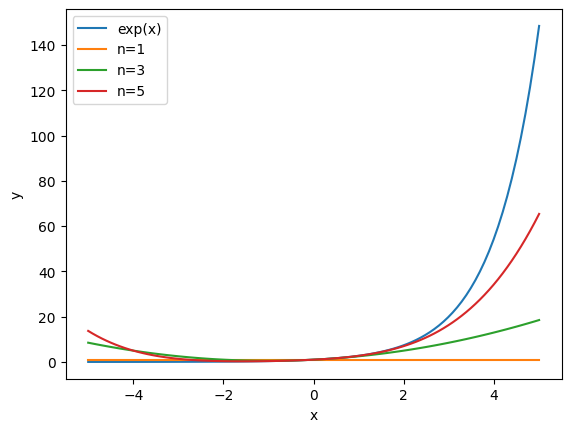

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create different taylor polynomials of the exponential function
def taylor_exp(x, n):
    exp = 0
    for i in range(0, n):
        exp += x**i/np.math.factorial(i)
    return exp

# Plot the different taylor polynomials and the exponential function
x = np.linspace(-5, 5, 100)
plt.plot(x, np.exp(x), label="exp(x)")
plt.plot(x, taylor_exp(x, 1), label="n=1")
plt.plot(x, taylor_exp(x, 3), label="n=3")
plt.plot(x, taylor_exp(x, 5), label="n=5")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Task 6
> **Use the Taylor ploynomial** to find an approximation of euler. It should be as precise as this $ e = 2.71828182845904523536 $

In [4]:
# Define the precision of euler calculation
euler = 2.71828182845904523536

for i in range(1, 100):
    calculation = taylor_exp(1, i)
    
    # Break if the precision is reached
    if abs(euler - calculation) < 10**(-20):
        break

print(f"e = {calculation}, n = {i} (Error: {abs(euler - calculation)})")


e = 2.7182818284590455, n = 99 (Error: 4.440892098500626e-16)


### Task 21
> **Express** the standard distribution as a taylor series with n = 0 and write a code that calculates the partial sums. Compare the time with the trapezoidal rule.

In [55]:
from math import factorial, sqrt, pi, exp
import time

def taylor_series_integral(a, n_terms):
    sum = 0
    common = 1 / sqrt(2 * pi)
    for n in range(n_terms):
        integral_term = a**(2*n+1) / (2*n+1)
        sum += common * ((-1)**n * integral_term) / factorial(2*n)
    return sum

def trapezoidal_method(f, a, b, n):
    h = (b-a)/n
    sum = f(a) + f(b)
    for i in range(1, n):
        sum += 2 * f(a + i*h)
    return h/2 * sum

def normal_distribution_function(x):
    return 1/sqrt(2*pi) * exp(-x**2/2)

# Sette opp testparametere
a = 1  # Øvre grense for integrasjon
n_terms = 5  # Antall termer i Taylor-rekken
n_trapezoids = 10000  # Antall trapeser

# Måle kjøretid og beregne resultat for Taylor-rekken
start_time = time.process_time()
taylor_result = taylor_series_integral(a, n_terms)
taylor_time = time.process_time() - start_time

# Måle kjøretid og beregne resultat for trapesmetoden
start_time = time.process_time()
trapezoidal_result = trapezoidal_method(normal_distribution_function, 0, a, n_trapezoids)
trapezoidal_time = time.process_time() - start_time

taylor_result, taylor_time, trapezoidal_result, trapezoidal_time



(0.3356983635014845,
 4.399999999993298e-05,
 0.3413447458669009,
 0.0038130000000000663)

### Task 22
> **How many n** is required to get an error smaller than $ 10^{-2} $

In [12]:
def min_terms_for_alternating_series(a, target_error):
    n = 0
    while True:
        term = a**(2*n) / factorial(2*n)
        if term < target_error:
            return n
        n += 1

# Finn minimum antall termer for en feil på under 10^-2
a = 1  # Øvre grense for integrasjon
target_error = 10**-2
min_terms = min_terms_for_alternating_series(a, target_error)

print(f"Minimum antall termer for en feil på under {target_error} er {min_terms}")

Minimum antall termer for en feil på under 0.01 er 3


### Task 27
### Task 27
> **Find** the value the taylor series is evaluated at for $ \sum_{n=0}^{\infty} \frac {(-1)^n}{(2n + 1)^2}$.


In [7]:
def series_sum(n_terms):
    sum = 0
    for n in range(n_terms):
        sum += (-1)**n / (2*n + 1)**2
    return sum

# Example usage
n_terms = 10000  # You can adjust the number of terms for accuracy
result = series_sum(n_terms)
print(f"Approximate value of the series: {result}")


Approximate value of the series: 0.9159655929272181
